# Capstone 2: loan default, EDA

### 1. Sourcing and loading

#### 1a. Import relevant libraries 

In [1]:
#importing the necicary files.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In the data wrangling portion of the capstone, I focused on creating a nice datafram that had descriptions of the columns which I called into this notbook as 'colomnDescription' in the cell below. secondly, the file I saved and explored in the data wrangling notebook was not loading for some reason. well, the cell was in the process of loading however the cell never compiled. since I did not actually need to manipulate that datafram significantly, i found it easier to just load the original data and start from the begining. the only manipulation i did perform on that file was transposing, which is what i do in the cells below

#### 1b. Load the data

columnDescription is a dataframe that was made in a previous notebook. the descriptions of the columns where cleanded up in a manner that is now easier to interpret. the 'Previous application.csv' file was obtained from the Kaggle loan default data linked below <br>
https://www.kaggle.com/gauravduttakiit/loan-defaulter

In [2]:
columnDescription = pd.read_csv('colDescriptionT.csv') #from other notebook
previous_application = pd.read_csv('previous_application.csv')

### 2. Exploring the data

#### 2a. Data overview

Just to have a good reverence as to what the columns mean, ill print out the column description dataframe that was created in a prior notebook down below. if you look through the data frame, you will see that the 0th row indicates two different CSV files.<br>
1. application_data.csv
2. previous_application.csv

given that the first file, application_data.csv, does not indicate the outcome of the loan applicants (wether they where approved or denied) we will be focusing on the second csv file, previous_application.csv

In [3]:
display(columnDescription)

SK_ID_CURR  \
0          application_data   
1  ID of loan in our sample   
2                       NaN   

                                              TARGET  \
0                                   application_data   
1  Target variable (1 - client with payment diffi...   
2                                                NaN   

                            NAME_CONTRACT_TYPE           CODE_GENDER  \
0                             application_data      application_data   
1  Identification if loan is cash or revolving  Gender of the client   
2                                          NaN                   NaN   

                    FLAG_OWN_CAR                      FLAG_OWN_REALTY  \
0               application_data                     application_data   
1  Flag if the client owns a car  Flag if client owns a house or flat   
2                            NaN                                  NaN   

                        CNT_CHILDREN      AMT_INCOME_TOTAL  \
0                   application_data      application_data   
1  Number of children the client has  Income of the client   
2                                NaN                   NaN   

                  AMT_CREDIT       AMT_ANNUITY  ...  \
0           application_data  application_data  ...   
1  Credit amount of the loan      Loan annuity  ...   
2                        NaN               NaN  ...   

         NAME_SELLER_INDUSTRY  \
0    previous_application.csv   
1  The industry of the seller   
2                         NaN   

                                         CNT_PAYMENT  \
0                           previous_application.csv   
1  Term of previous credit at application of the ...   
2                                                NaN   

                                    NAME_YIELD_GROUP  \
0                           previous_application.csv   
1  Grouped interest rate into small medium and hi...   
2                                            grouped   

                                 PRODUCT_COMBINATION  \
0                           previous_application.csv   
1  Detailed product combination of the previous a...   
2                                                NaN   

                                  DAYS_FIRST_DRAWING  \
0                           previous_application.csv   
1  Relative to application date of current applic...   
2              time only relative to the application   

                                      DAYS_FIRST_DUE  \
0                           previous_application.csv   
1  Relative to application date of current applic...   
2              time only relative to the application   

                           DAYS_LAST_DUE_1ST_VERSION  \
0                           previous_application.csv   
1  Relative to application date of current applic...   
2              time only relative to the application   

                                       DAYS_LAST_DUE  \
0                           previous_application.csv   
1  Relative to application date of current applic...   
2              time only relative to the application   

                                    DAYS_TERMINATION  \
0                           previous_application.csv   
1  Relative to application date of current applic...   
2              time only relative to the application   

                           NFLAG_INSURED_ON_APPROVAL  
0                           previous_application.csv  
1  Did the client requested insurance during the ...  
2                                                NaN  

[3 rows x 160 columns]

Before we look for any relationships between features, its helpful to first begin by printing the info of the datafram in this notebook to take a look at what Dtypes we are dealing with. are they numerical or catigorical? is there any missing data?

In [4]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

the outpot of the cell above indicated the type of data that each row has which we should keep in the back of our mind as we wrok though the notebook.

#### 2b. Data cleaning

Before we move forward, we need to find how much data is missing from our dataframe. The following line prints the percentage of missing data per column.

In [5]:
round((previous_application.isnull().sum()/len(previous_application)*100.00),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

Just to better visualize how much data is missing, i created a bar graph which shows the percentage of missing values. I also plotted a horizontal red line that indicates the '40%' line meaning, any bar above that line is missing more than 40%

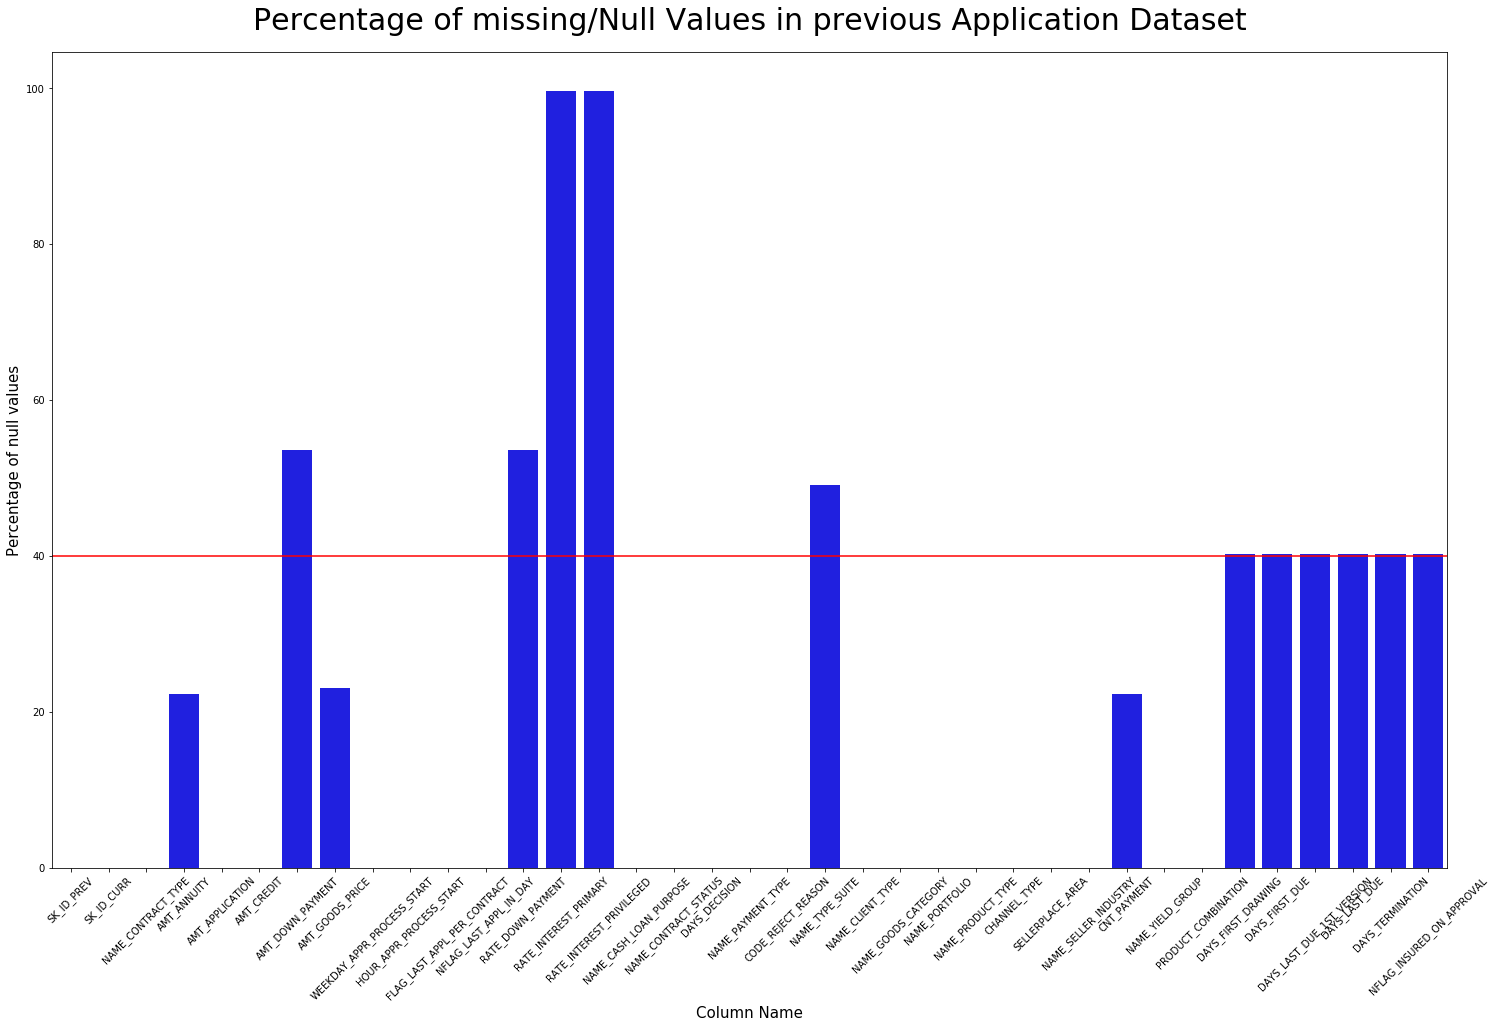

In [6]:
plt.figure(figsize = [25,15])
plt.title("Percentage of missing/Null Values in previous Application Dataset",fontsize=30, y=1.02)
plt.xlabel("Column Name", fontsize=15)
plt.ylabel("Percentage of null values", fontsize= 15)
plt.xticks(rotation=45)
ax = sns.barplot(previous_application.columns,round((previous_application.isnull().sum()/previous_application.shape[0])*100,2), color = 'blue')
ax.axhline(40,color='red')
plt.show()

40% null/missing values is quite significant, I think its best if we do not take these into consideration because it could result in missleading results therefor, we will proceed to drop those values from the dataframe

In [7]:
# Storing columns names along their % of NULL values and storing them as 'previous_missing' dataframe 
previous_missing = pd.DataFrame((previous_application.isnull().sum()/len(previous_application))*100).reset_index()
previous_missing.columns = ['Column Name', 'Null Value %']

In [8]:
previous_missing

Column Name  Null Value %
0                    SK_ID_PREV      0.000000
1                    SK_ID_CURR      0.000000
2            NAME_CONTRACT_TYPE      0.000000
3                   AMT_ANNUITY     22.286665
4               AMT_APPLICATION      0.000000
5                    AMT_CREDIT      0.000060
6              AMT_DOWN_PAYMENT     53.636480
7               AMT_GOODS_PRICE     23.081773
8    WEEKDAY_APPR_PROCESS_START      0.000000
9       HOUR_APPR_PROCESS_START      0.000000
10  FLAG_LAST_APPL_PER_CONTRACT      0.000000
11       NFLAG_LAST_APPL_IN_DAY      0.000000
12            RATE_DOWN_PAYMENT     53.636480
13        RATE_INTEREST_PRIMARY     99.643698
14     RATE_INTEREST_PRIVILEGED     99.643698
15       NAME_CASH_LOAN_PURPOSE      0.000000
16         NAME_CONTRACT_STATUS      0.000000
17                DAYS_DECISION      0.000000
18            NAME_PAYMENT_TYPE      0.000000
19           CODE_REJECT_REASON      0.000000
20              NAME_TYPE_SUITE     49.119754
21             NAME_CLIENT_TYPE      0.000000
22          NAME_GOODS_CATEGORY      0.000000
23               NAME_PORTFOLIO      0.000000
24            NAME_PRODUCT_TYPE      0.000000
25                 CHANNEL_TYPE      0.000000
26             SELLERPLACE_AREA      0.000000
27         NAME_SELLER_INDUSTRY      0.000000
28                  CNT_PAYMENT     22.286366
29             NAME_YIELD_GROUP      0.000000
30          PRODUCT_COMBINATION      0.020716
31           DAYS_FIRST_DRAWING     40.298129
32               DAYS_FIRST_DUE     40.298129
33    DAYS_LAST_DUE_1ST_VERSION     40.298129
34                DAYS_LAST_DUE     40.298129
35             DAYS_TERMINATION     40.298129
36    NFLAG_INSURED_ON_APPROVAL     40.298129

the following cell filters out any columns that contain 40% null values or more


In [9]:
# Columns having more than 40% Null Values
missing_40 = previous_missing[previous_missing['Null Value %']>=40]
#the following line only keeps columns with less than 40% missing values
previous_missing[previous_missing['Null Value %'] < 40]

Column Name  Null Value %
0                    SK_ID_PREV      0.000000
1                    SK_ID_CURR      0.000000
2            NAME_CONTRACT_TYPE      0.000000
3                   AMT_ANNUITY     22.286665
4               AMT_APPLICATION      0.000000
5                    AMT_CREDIT      0.000060
7               AMT_GOODS_PRICE     23.081773
8    WEEKDAY_APPR_PROCESS_START      0.000000
9       HOUR_APPR_PROCESS_START      0.000000
10  FLAG_LAST_APPL_PER_CONTRACT      0.000000
11       NFLAG_LAST_APPL_IN_DAY      0.000000
15       NAME_CASH_LOAN_PURPOSE      0.000000
16         NAME_CONTRACT_STATUS      0.000000
17                DAYS_DECISION      0.000000
18            NAME_PAYMENT_TYPE      0.000000
19           CODE_REJECT_REASON      0.000000
21             NAME_CLIENT_TYPE      0.000000
22          NAME_GOODS_CATEGORY      0.000000
23               NAME_PORTFOLIO      0.000000
24            NAME_PRODUCT_TYPE      0.000000
25                 CHANNEL_TYPE      0.000000
26             SELLERPLACE_AREA      0.000000
27         NAME_SELLER_INDUSTRY      0.000000
28                  CNT_PAYMENT     22.286366
29             NAME_YIELD_GROUP      0.000000
30          PRODUCT_COMBINATION      0.020716

I am also choosing to drop an additional 4 columns which I belive wont be useful for this investigation. columns such as 'WEEKDAY_APPR_PROCESS_START' which indicate what day of the week the applicant started their loan process along with what hour the application process began. 


In [10]:
#printing description just to verify what the column contains
print(columnDescription[['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']])

                          WEEKDAY_APPR_PROCESS_START  \
0                                   application_data   
1  On which day of the week did the client apply ...   
2                                                NaN   

                             HOUR_APPR_PROCESS_START  \
0                                   application_data   
1  Approximately at what hour did the client appl...   
2                                            rounded   

                         FLAG_LAST_APPL_PER_CONTRACT  \
0                           previous_application.csv   
1  Flag if it was last application for the previo...   
2                                                NaN   

                              NFLAG_LAST_APPL_IN_DAY  
0                           previous_application.csv  
1  Flag if the application was the last applicati...  
2                                                NaN  


In [11]:
# Adding 4 more variables to the unwanted list which won't help in our analysis
prev_unwanted = missing_40['Column Name'].to_list() + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [12]:
len(prev_unwanted)

15

In [13]:
previous_application.drop(labels = prev_unwanted, axis=1, inplace=True)

double cheking the % null values in order to verify sucessful filtering

In [14]:
round((previous_application.isnull().sum()/len(previous_application)*100.00),2)


SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

Although we have 'AMT_ANNUITY', 'AMT_GOODS_PRICE', and 'CNT_PAYMENT' that still have just over 20% missing values, we have made progress by droping columns containing 40% null values or more along with 4 other columns which dont seem to contribute any valuable information, we can proceed to find a relation between any leftover featurs. before we do that, its a good idea to double check our new dataframe and take a look at the data types we will be handling now.

In [15]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

### 3. Identifying relationships

#### 3a. identifying relationships through corrolation 

We can now attempt to identify any relationship between the features. the most popular method of finding relationships between numerical data is calculate how much two rows corrolate to one another. <br>
recall, a corrolation of 1 indicates a strong relationtship while a corolattion value of 0 indicates no relation. <br>
the cell below calculates the correlation between the the rows of numerical values


In [16]:
previous_application.corr()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  \
SK_ID_PREV          1.000000   -0.000321     0.011459         0.003302   
SK_ID_CURR         -0.000321    1.000000     0.000577         0.000280   
AMT_ANNUITY         0.011459    0.000577     1.000000         0.808872   
AMT_APPLICATION     0.003302    0.000280     0.808872         1.000000   
AMT_CREDIT          0.003659    0.000195     0.816429         0.975824   
AMT_GOODS_PRICE     0.015293    0.000369     0.820895         0.999884   
DAYS_DECISION       0.019100   -0.000637     0.279051         0.133660   
SELLERPLACE_AREA   -0.001079    0.001265    -0.015027        -0.007649   
CNT_PAYMENT         0.015589    0.000031     0.394535         0.680630   

                  AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  \
SK_ID_PREV          0.003659         0.015293       0.019100   
SK_ID_CURR          0.000195         0.000369      -0.000637   
AMT_ANNUITY         0.816429         0.820895       0.279051   
AMT_APPLICATION     0.975824         0.999884       0.133660   
AMT_CREDIT          1.000000         0.993087       0.133763   
AMT_GOODS_PRICE     0.993087         1.000000       0.290422   
DAYS_DECISION       0.133763         0.290422       1.000000   
SELLERPLACE_AREA   -0.009567        -0.015842      -0.018382   
CNT_PAYMENT         0.674278         0.672129       0.246453   

                  SELLERPLACE_AREA  CNT_PAYMENT  
SK_ID_PREV               -0.001079     0.015589  
SK_ID_CURR                0.001265     0.000031  
AMT_ANNUITY              -0.015027     0.394535  
AMT_APPLICATION          -0.007649     0.680630  
AMT_CREDIT               -0.009567     0.674278  
AMT_GOODS_PRICE          -0.015842     0.672129  
DAYS_DECISION            -0.018382     0.246453  
SELLERPLACE_AREA          1.000000    -0.010646  
CNT_PAYMENT              -0.010646     1.000000

Although the table above is very helpful, it may be easier to visualise with a heatmap which is generated below

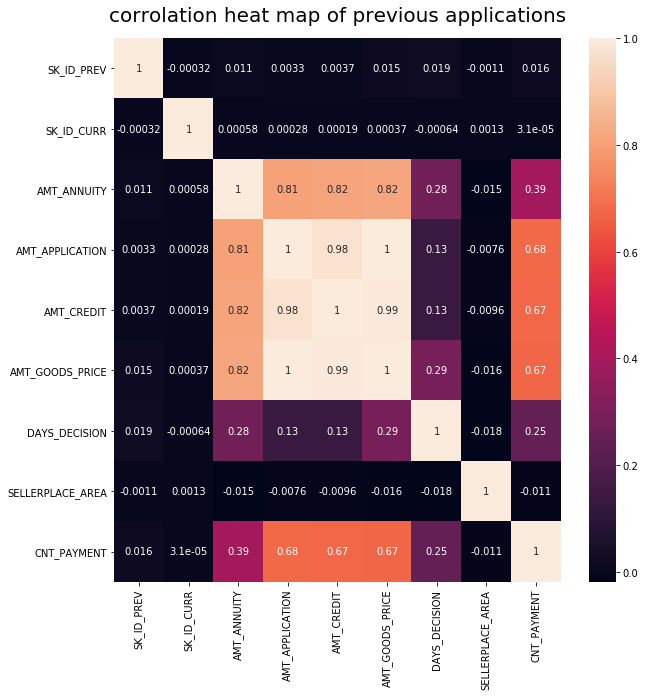

In [17]:
plt.figure(figsize=(10, 10))
plt.title('corrolation heat map of previous applications', fontsize=20, y=1.02)
sns.heatmap(previous_application.corr(), annot = True)
plt.show()

we now have a nice heatmap which can aid in discovering relationships between features but as you can see, there is no real tangable mathmatical relationship between the values. aside from the obvious relationships such as 'ammount_application' and 'ammount_goods' where the ammount of the application is equal in price to the good being purchased. This means that we need to look for other methods of finding relationships within the data.

#### 3b. Alternative methods of finding relationships

To begin, I start by creating a filtered scatter plot with ammount of the application vs amount of income of only approved applications

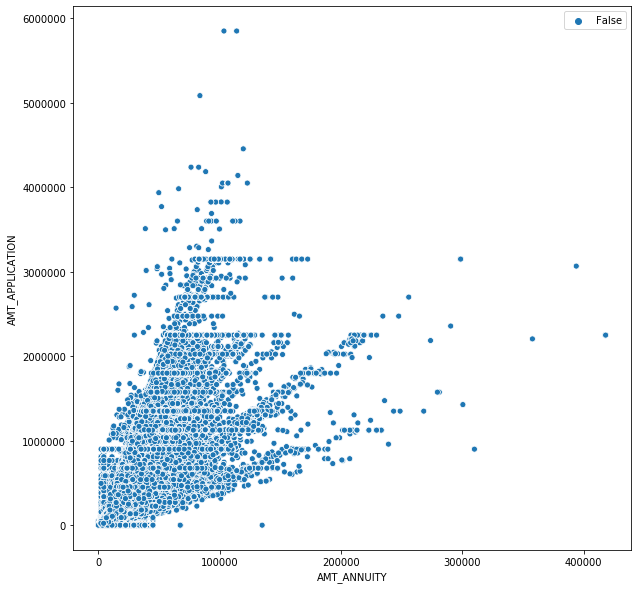

In [18]:
drop='Canceled', 'Unused offer'
plt.figure(figsize=(10, 10))
sns.scatterplot(y = 'AMT_APPLICATION' , x = 'AMT_ANNUITY', data = previous_application, hue='NAME_CONTRACT_STATUS' == 'Approved' )
plt.show()

Based off of the plot above, we can kind of see a relationship between the application ammount and the annuity of the client with a hue of the contract status. The refused clients seem to be applyig for loans which are out of thier price range, which would make sence but we need to dig a little deeper. the plot below has a hue of the contract status, where they approved of refused?

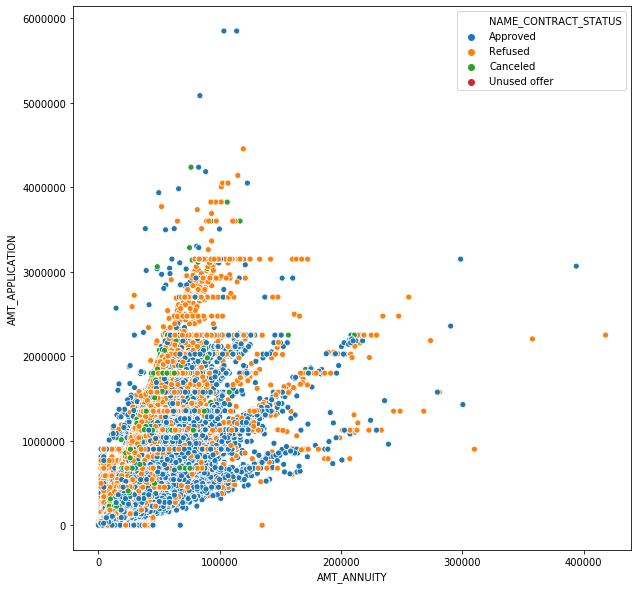

In [19]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y = previous_application['AMT_APPLICATION'] , x = previous_application['AMT_ANNUITY'], 
                hue=previous_application['NAME_CONTRACT_STATUS'])
plt.show()

This is a good start but unfortunatly its too busy to actually see a relationship. Aside from that, we need to filter the data a bit more because the cancelled and unused offers do not indicate anything useful so taking them out would be best. Secondly, since the plot seems very congested, seperating the 'refused' and 'approved' data would be the best option so that is done below.

In [20]:
approved = previous_application[previous_application['NAME_CONTRACT_STATUS']=='Approved']
refused = previous_application[previous_application['NAME_CONTRACT_STATUS']== 'Refused']

In [21]:
#verifying sucessful sepparation of contract status
print(approved['NAME_CONTRACT_STATUS'].value_counts())
print(refused['NAME_CONTRACT_STATUS'].value_counts())

Approved    1036781
Name: NAME_CONTRACT_STATUS, dtype: int64
Refused    290678
Name: NAME_CONTRACT_STATUS, dtype: int64


Now that we have isolated the approved and refused applicants, we can begin to dig in and find relationships. i found the reasoning behind the loan be be quite interesting so i wanted to visualize how many catagories of loan purpose there is but before doing so, we must see how many categories there are

In [24]:
print(approved['NAME_CASH_LOAN_PURPOSE'].value_counts())
print(refused['NAME_CASH_LOAN_PURPOSE'].value_counts())

XAP                                 724241
XNA                                 285607
Repairs                               8677
Other                                 6677
Urgent needs                          3574
Everyday expenses                     1236
Medicine                              1037
Buying a used car                      881
Education                              765
Building a house or an annex           675
Purchase of electronic equipment       588
Journey                                559
Wedding / gift / holiday               397
Car repairs                            358
Furniture                              333
Payments on other loans                304
Buying a new car                       221
Buying a home                          200
Buying a holiday home / land           132
Business development                   130
Gasification / water supply            115
Buying a garage                         39
Hobby                                   19
Money for a

Unfortunatly, this too has a lot of missing data which was not dropped before. 'XNA' and 'XAP' also represents null values so we will need to drop these before moving forward. <br>
Given that we now know these represent missing values, a few more variables will be created below that leave us with good data

In [28]:
#first filtered variable for the column 'NAME_CASH_LOAN_PURPOSE'
contract1 = previous_application[previous_application['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
contract = contract1[contract1['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
dropped_na = contract[contract['NAME_CASH_LOAN_PURPOSE']!= 'Other']

print(contract['NAME_CASH_LOAN_PURPOSE'].value_counts())

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [29]:
#creating new 'approved' and 'refused' variables without 'XNA', 'XAP', and 'other'
refused1 = refused[refused['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
refused_filtered = refused1[refused1['NAME_CASH_LOAN_PURPOSE'] != 'XAP']

approved1 = approved[approved['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
approved_filtered = approved1[approved1['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
#verifying thes inputs where filtered properly
display('Refused values', refused_filtered['NAME_CASH_LOAN_PURPOSE'].value_counts(), 
        'Apprived values', approved_filtered['NAME_CASH_LOAN_PURPOSE'].value_counts())

'Refused values'

Repairs                             14421
Other                                8519
Urgent needs                         4690
Building a house or an annex         1920
Buying a used car                    1896
Payments on other loans              1553
Everyday expenses                    1147
Medicine                             1099
Education                             782
Buying a new car                      735
Journey                               660
Buying a home                         626
Wedding / gift / holiday              542
Purchase of electronic equipment      461
Car repairs                           422
Furniture                             397
Buying a holiday home / land          382
Business development                  277
Gasification / water supply           180
Buying a garage                        89
Hobby                                  36
Money for a third person               13
Refusal to name the goal               11
Name: NAME_CASH_LOAN_PURPOSE, dtyp

'Apprived values'

Repairs                             8677
Other                               6677
Urgent needs                        3574
Everyday expenses                   1236
Medicine                            1037
Buying a used car                    881
Education                            765
Building a house or an annex         675
Purchase of electronic equipment     588
Journey                              559
Wedding / gift / holiday             397
Car repairs                          358
Furniture                            333
Payments on other loans              304
Buying a new car                     221
Buying a home                        200
Buying a holiday home / land         132
Business development                 130
Gasification / water supply          115
Buying a garage                       39
Hobby                                 19
Money for a third person              12
Refusal to name the goal               4
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

we now begin by visualizing the different purposes of loans

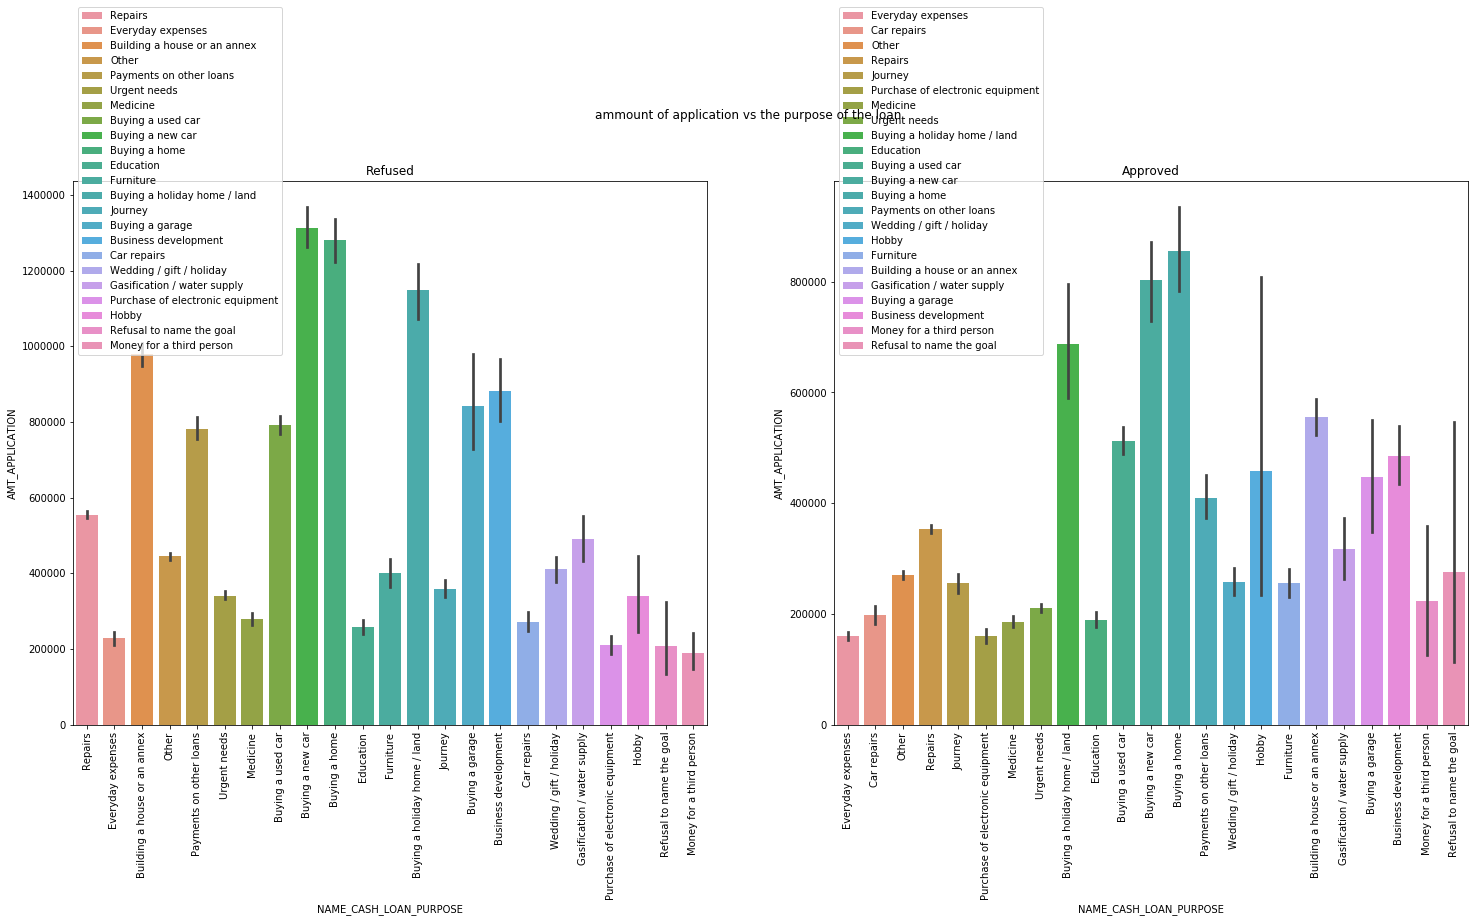

'how many of each category there are obviously'

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (25,10))

fig.suptitle('ammount of application vs the purpose of the loan')

one = sns.barplot(ax = axes[0], y = refused_filtered['AMT_APPLICATION'] , x = refused_filtered['NAME_CASH_LOAN_PURPOSE'],
                hue = refused_filtered['NAME_CASH_LOAN_PURPOSE'], dodge = False)

one.legend(loc='center left', bbox_to_anchor=(0, 1))
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Refused')


two = sns.barplot(ax = axes[1], y = approved_filtered['AMT_APPLICATION'] , x = approved_filtered['NAME_CASH_LOAN_PURPOSE'],
                hue = approved_filtered['NAME_CASH_LOAN_PURPOSE'], dodge=False)
two.legend(loc='center left', bbox_to_anchor=(0, 1))
axes[1].set_title('Approved')
axes[1].tick_params(axis='x', rotation=90)
plt.show()

#what does this tell us?
'''how many of each category there are obviously'''

we can see that a majority of the loans are used for either a vehicle or realestate which is to be expected. lets plot these in hopes to discover a relationship

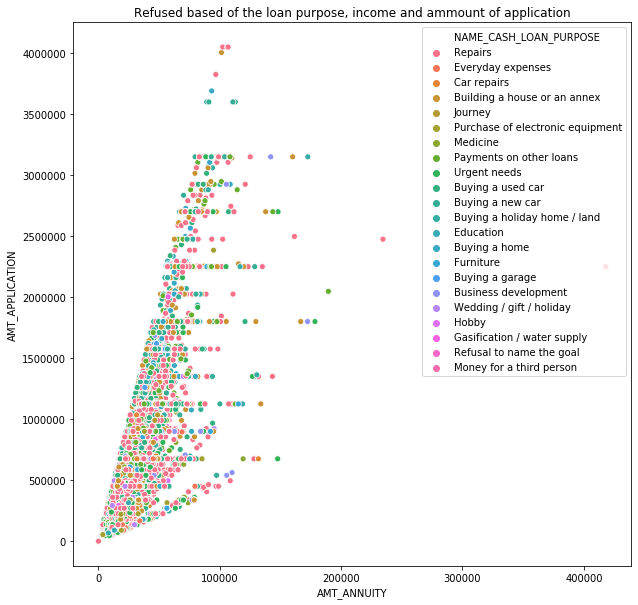

In [31]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y = refused['AMT_APPLICATION'] , x = refused['AMT_ANNUITY'],
                hue = dropped_na['NAME_CASH_LOAN_PURPOSE'])
plt.title('Refused based of the loan purpose, income and ammount of application')
plt.show()

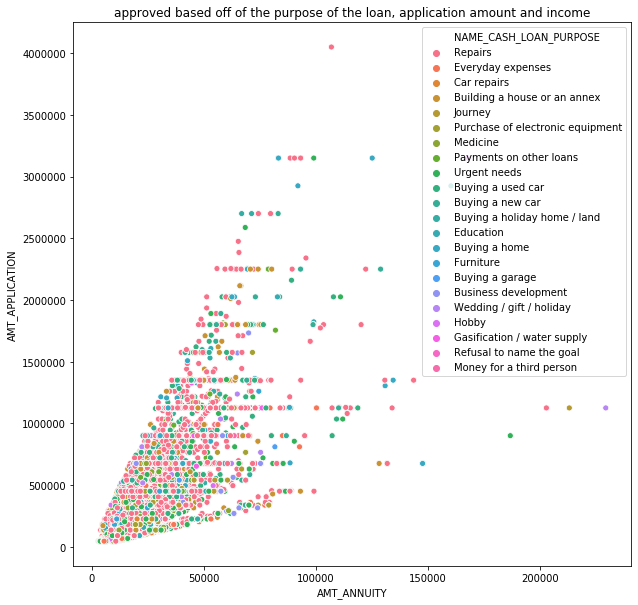

In [32]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y = approved['AMT_APPLICATION'] , x = approved['AMT_ANNUITY'], 
hue = dropped_na['NAME_CASH_LOAN_PURPOSE'])
plt.title('approved based off of the purpose of the loan, application amount and income')
plt.show()

Overall, IF we where to fit a line within all this data, we see that the slope of the line fitted to the rejected dataset would me much steeper than the approved one however, this image is still too congested and does not give a clear indicator of any relationship so i will plot each categoty independently and have a hue of the puropse with Y axis as the application ammount and the X axis as the income ammount


In [33]:
#list of categories
mylist = ('Repairs', 'Urgent needs', 'Buying a used car', 'Building a house or an annex',
        'Everyday expenses', 'Medicine', 'Payments on other loans', 'Education', 
        'Journey', 'Purchase of electronic equipment', 'Buying a new car', 'Wedding / gift / holiday',
        'Buying a home', 'Car repairs', 'Furniture', 'Buying a holiday home / land', 
        'Business development', 'Gasification / water supply', 'Buying a garage', 'Hobby', 
        'Money for a third person', 'Refusal to name the goal') 

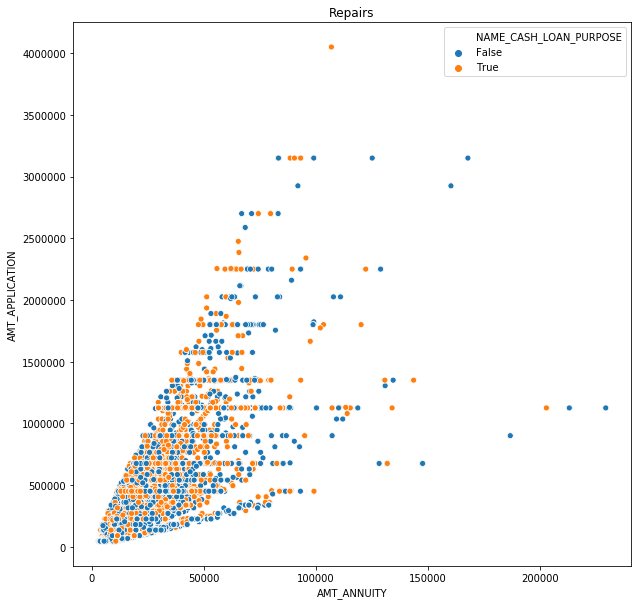

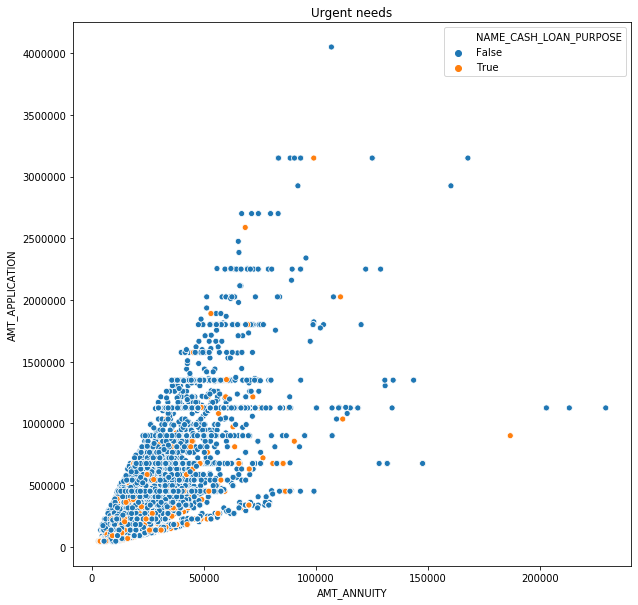

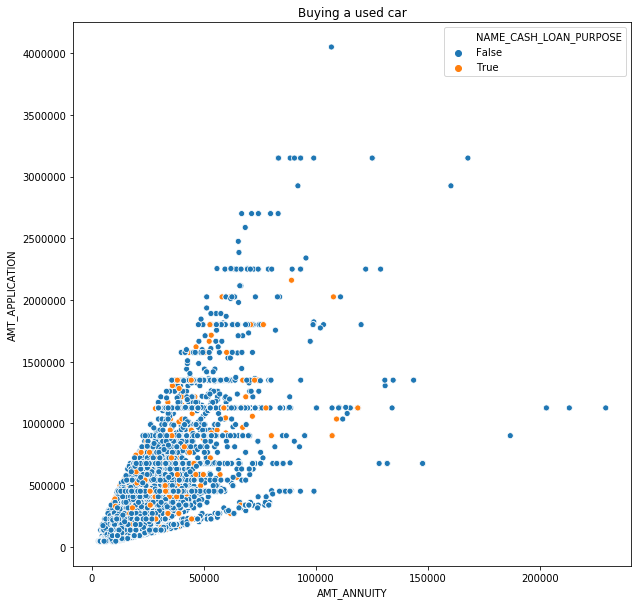

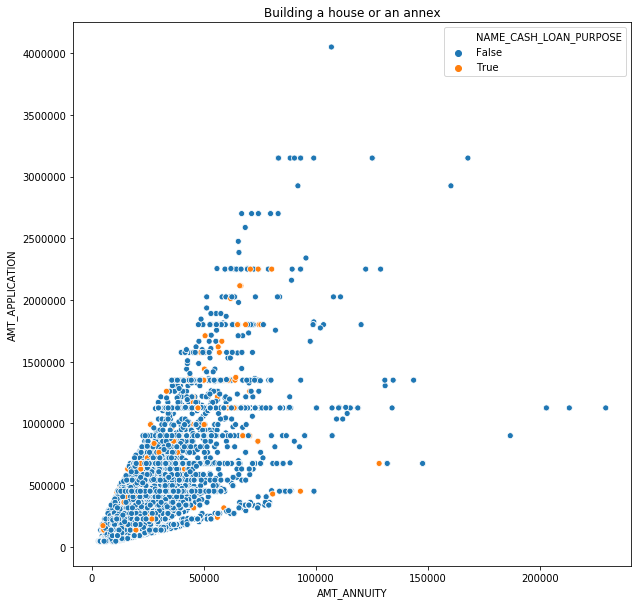

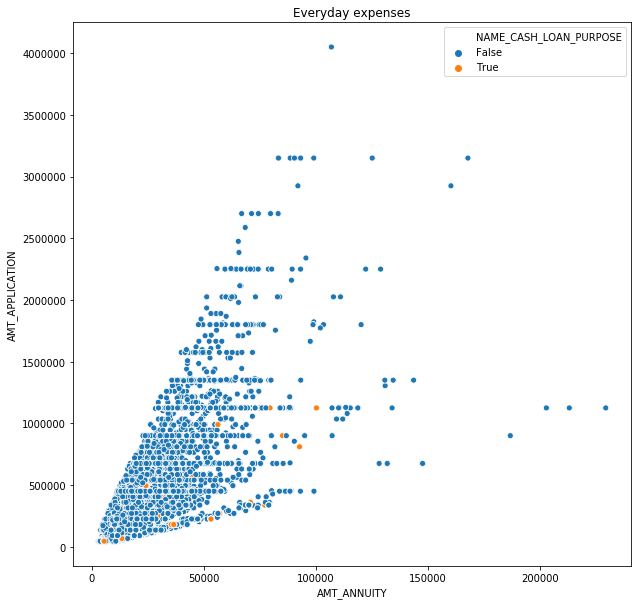

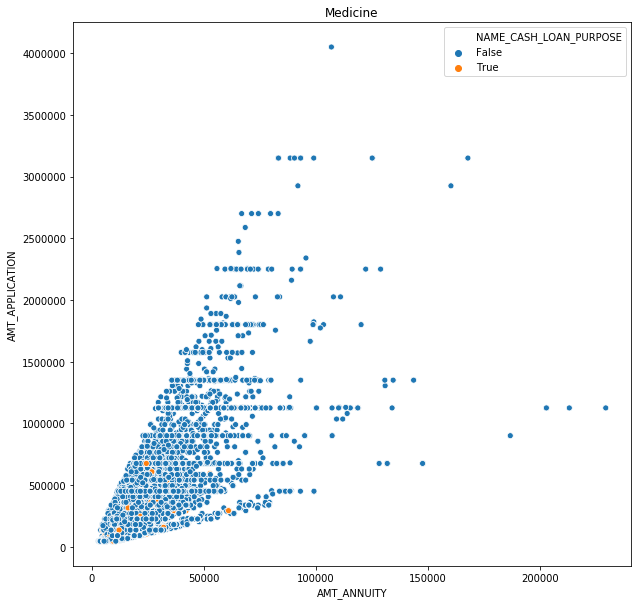

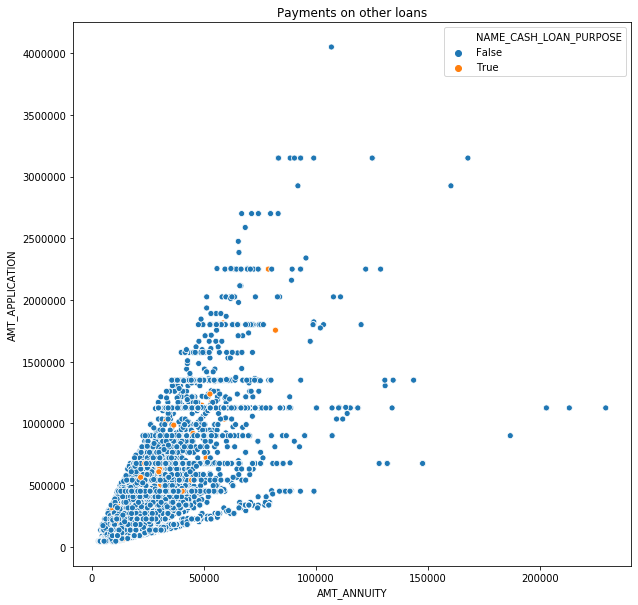

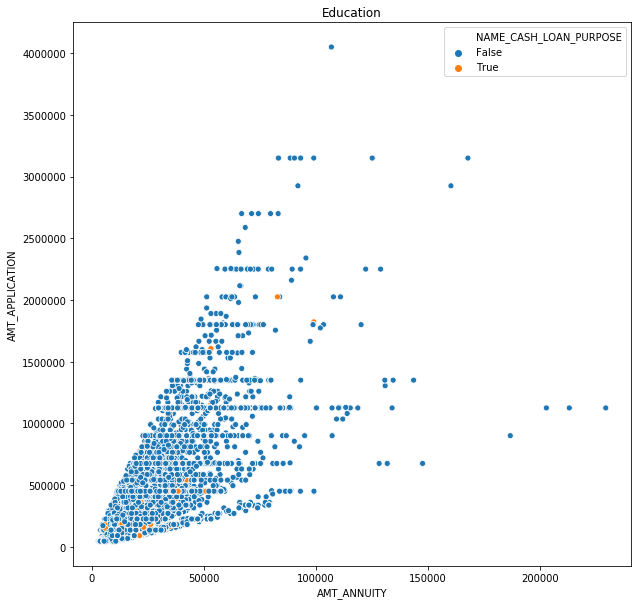

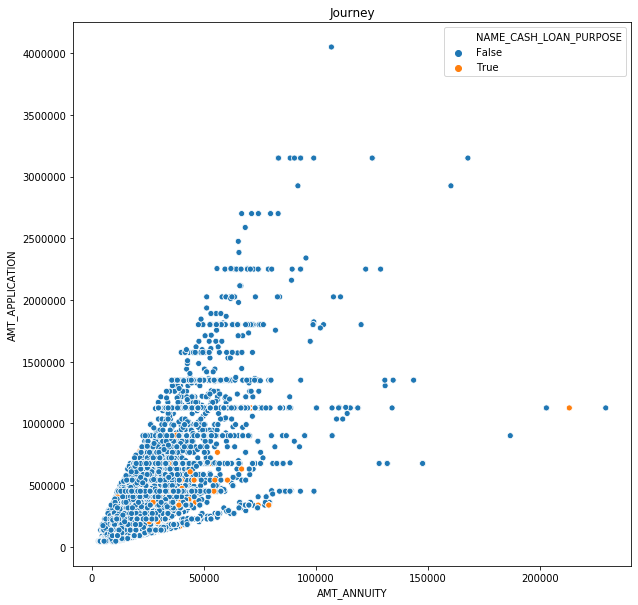

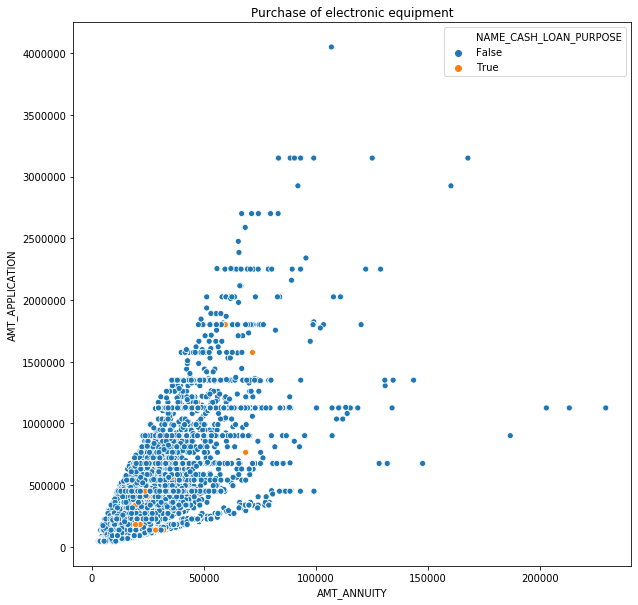

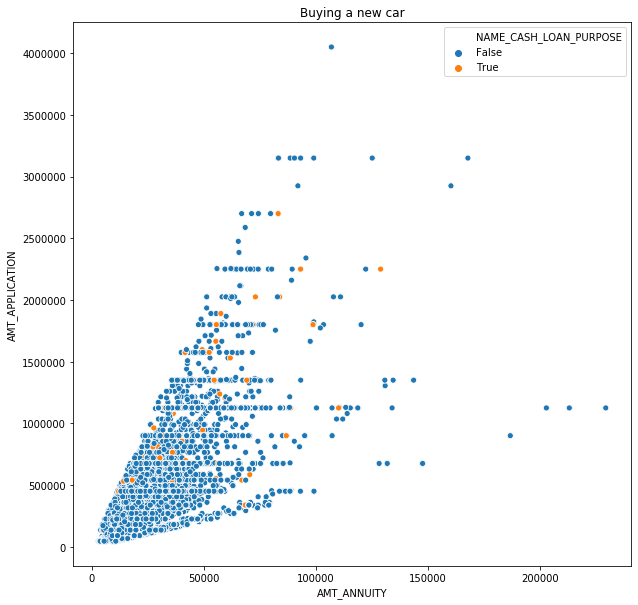

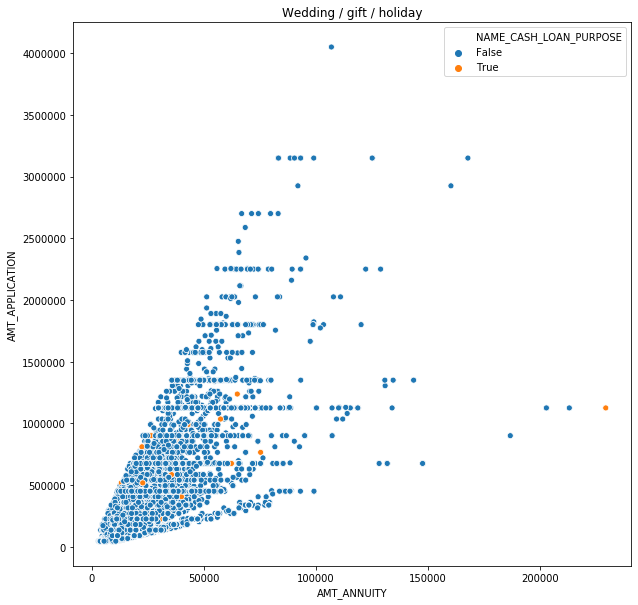

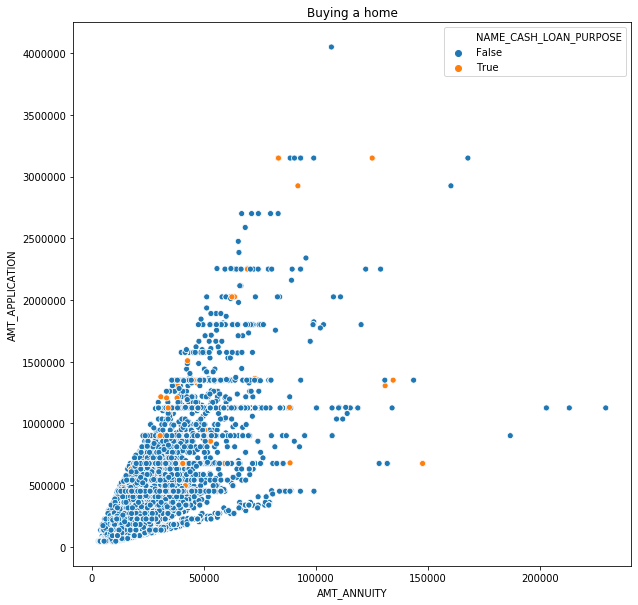

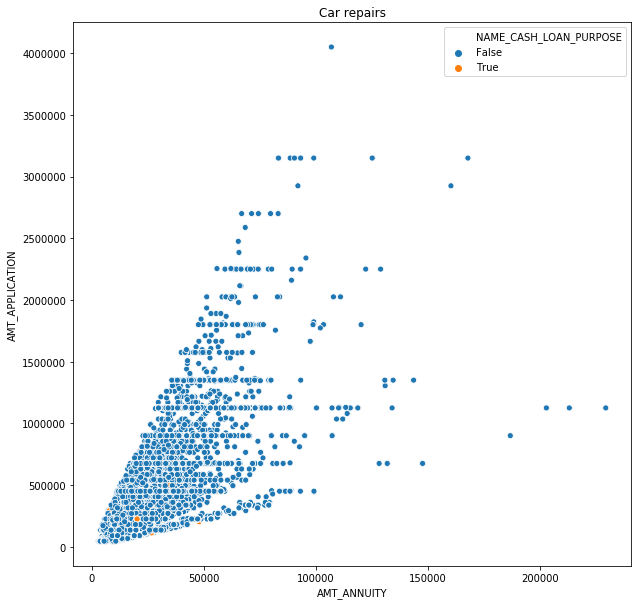

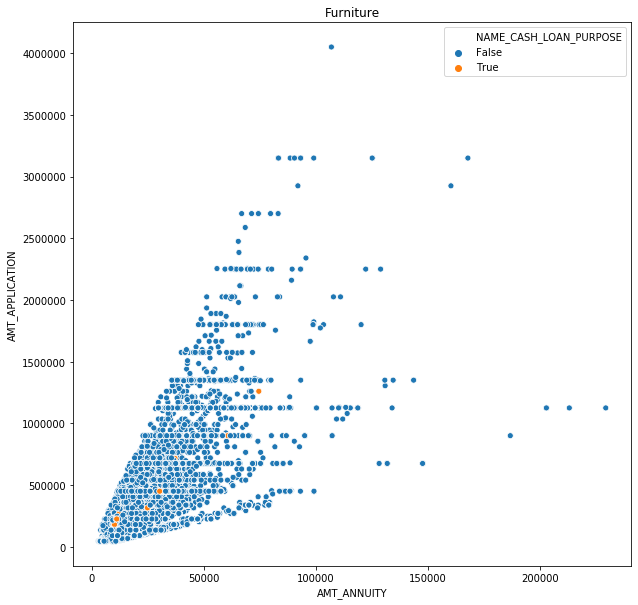

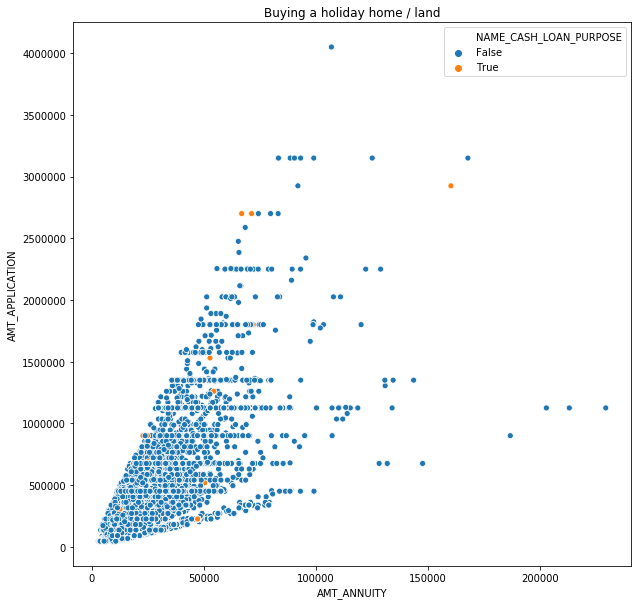

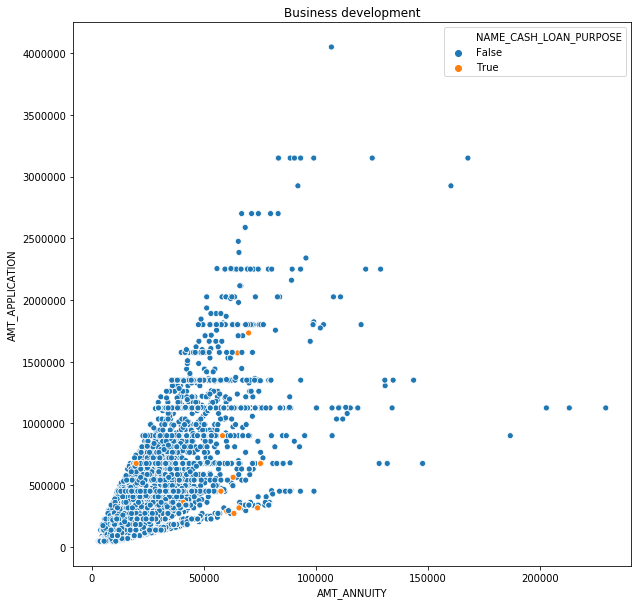

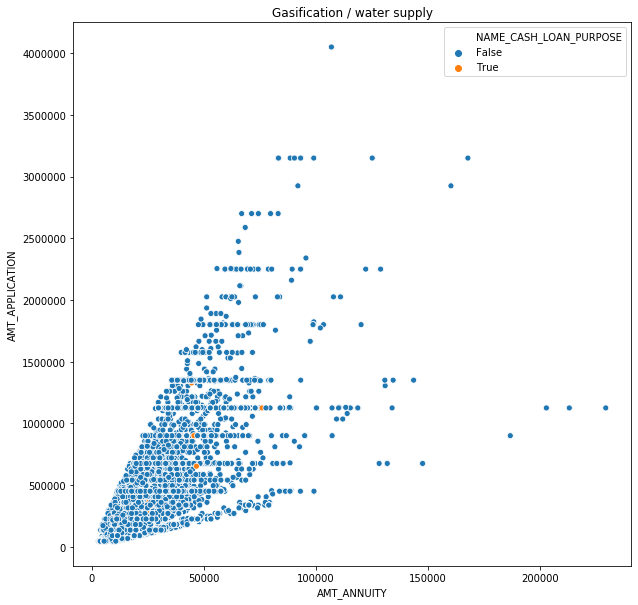

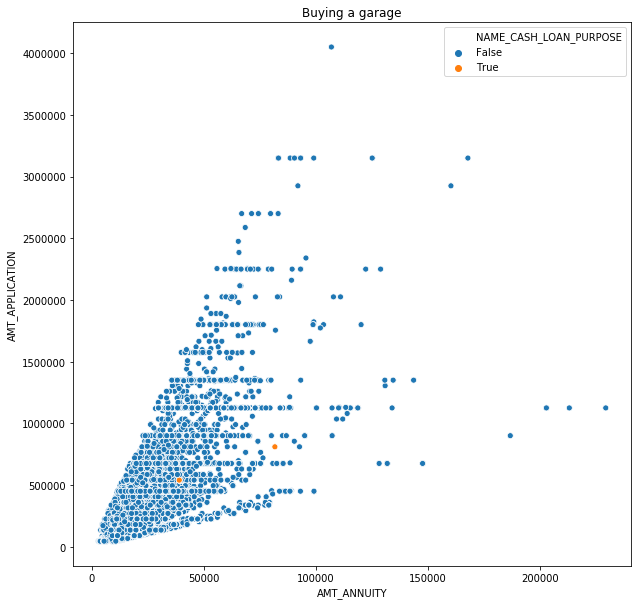

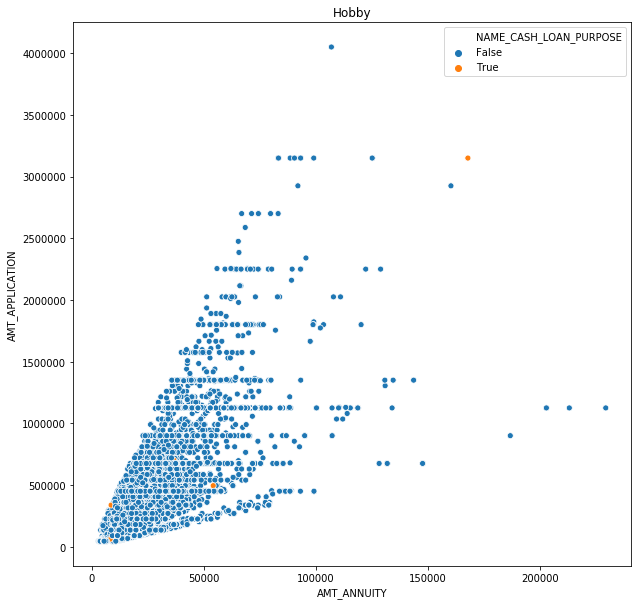

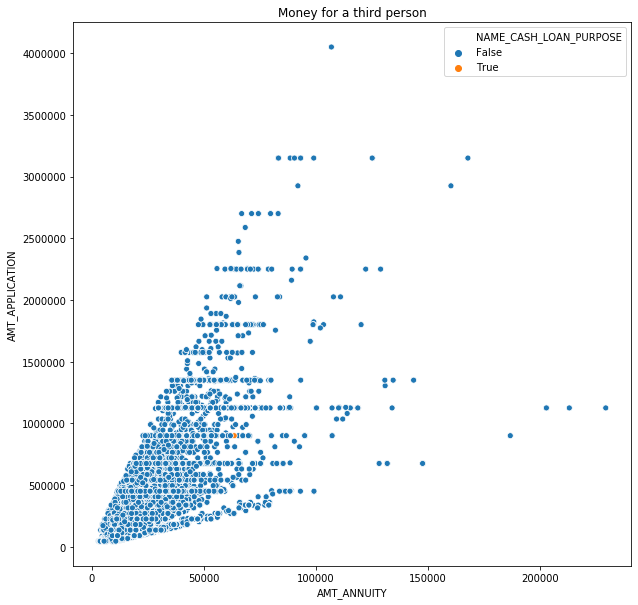

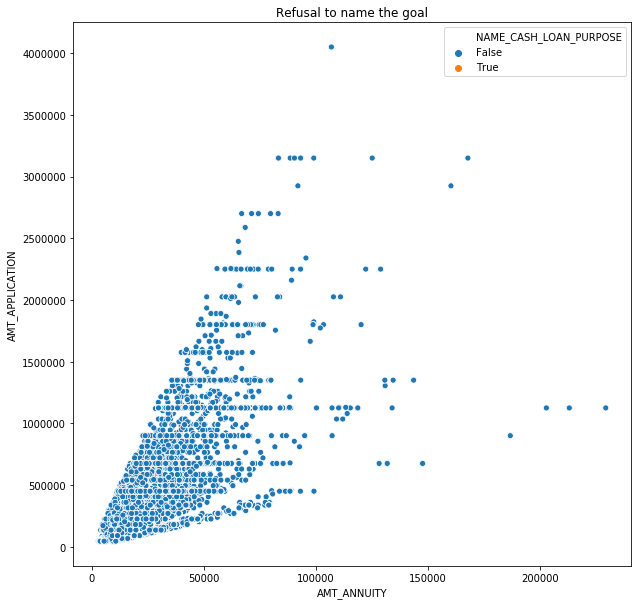

In [34]:
for i in mylist:
    plt.figure(figsize=(10, 10))
    plt.title('approved')
    sns.scatterplot(y = approved['AMT_APPLICATION'] , x = approved['AMT_ANNUITY'], 
    hue = dropped_na['NAME_CASH_LOAN_PURPOSE'] == i)
    plt.title(i)
    plt.show()


Although this plots above are inciteful, they might still be difficult to interpret there for, i seperated the approved and refused applications a little more and plotted each purpose independently

In [40]:
#creating a new variable for approved loans
contract1 = approved[approved['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
approved1 = contract1[contract1['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
dropped_na_approved = approved1[approved1['NAME_CASH_LOAN_PURPOSE']!= 'Other']

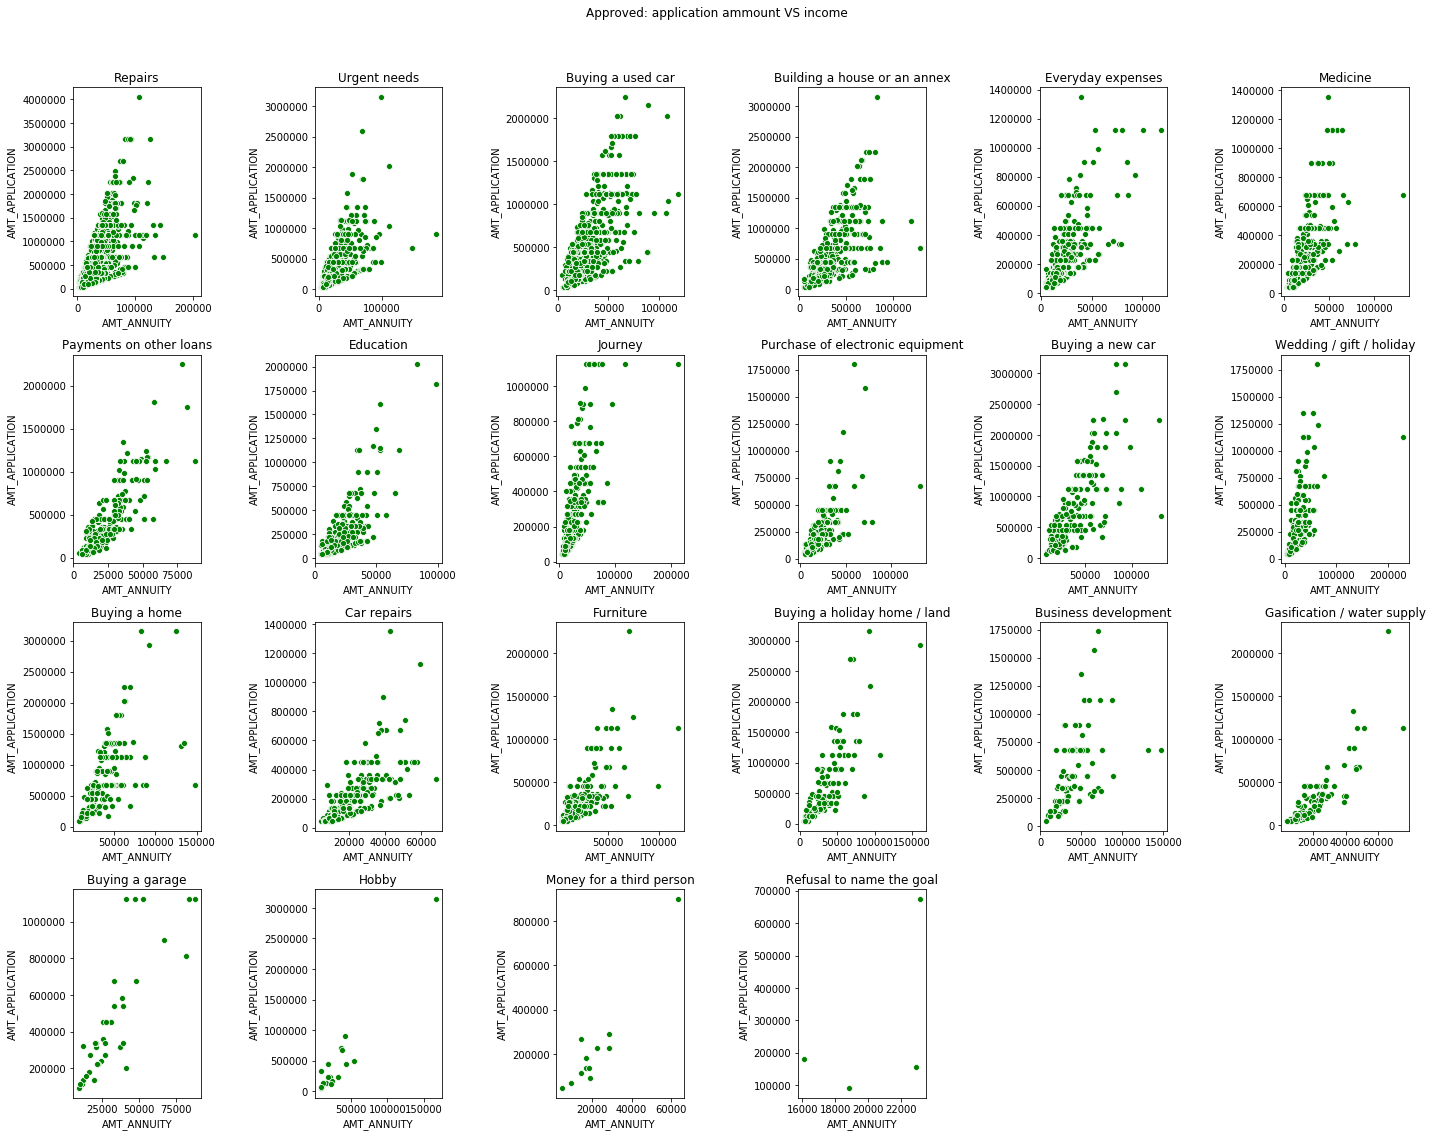

In [41]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Approved: application ammount VS income', y=1.05)

c = 1
for ii in mylist:
    loop = dropped_na_approved[dropped_na_approved['NAME_CASH_LOAN_PURPOSE'] == ii]
    plt.subplot(4, 6, c)
    plt.title('{}'.format(ii))
    plt.xlabel(ii)
    sns.scatterplot(y = loop['AMT_APPLICATION'] , x = loop['AMT_ANNUITY'], color='green')
    c = c + 1
    plt.tight_layout()
plt.show()


In [42]:
#creating a new filter for refused loans
contract2 = refused[refused['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
refused1 = contract2[contract2['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
dropped_na_refused = refused1[refused1['NAME_CASH_LOAN_PURPOSE']!= 'Other']


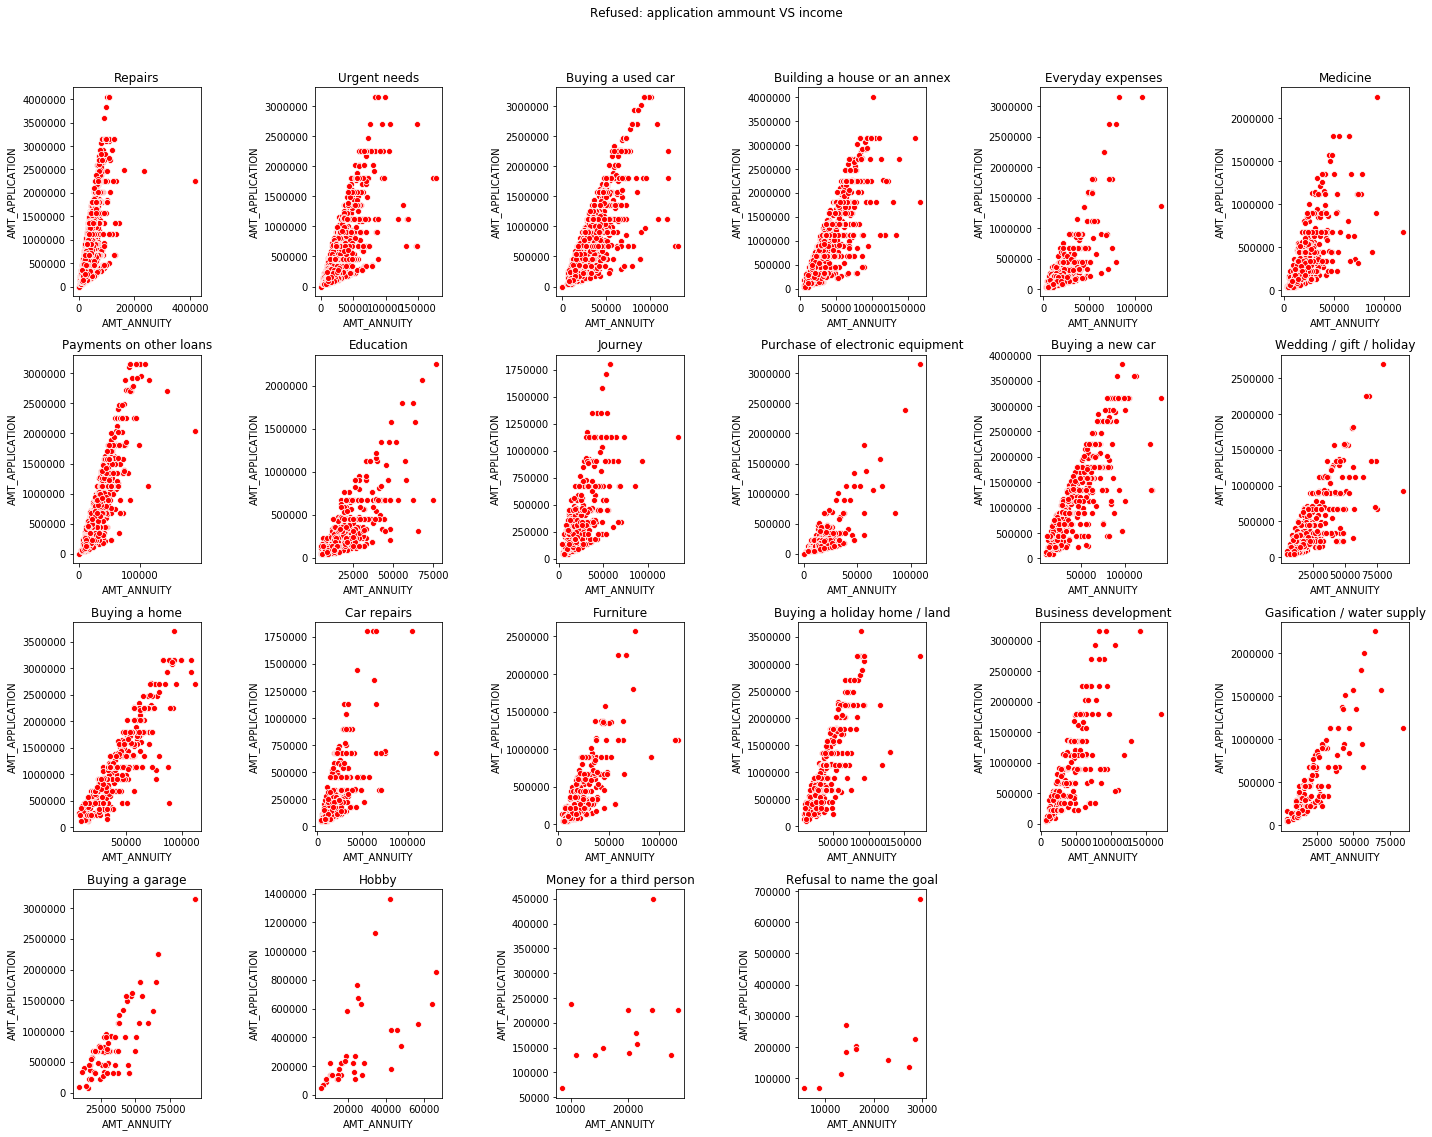

In [43]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Refused: application ammount VS income', y=1.05)
c = 1
for ii in mylist:
    loop = dropped_na_refused[dropped_na_refused['NAME_CASH_LOAN_PURPOSE'] == ii]
    plt.subplot(4, 6, c)
    plt.title('{}'.format(ii))
    plt.xlabel(ii)
    sns.scatterplot(y = loop['AMT_APPLICATION'] , x = loop['AMT_ANNUITY'], color='red')
    c = c + 1
    plt.tight_layout()
plt.show()


Thats looking much better. we now add a hue in order to identify any potential categories. wth some trial and error, I discovered nice grouping after using the interest rates as the hue for these plots

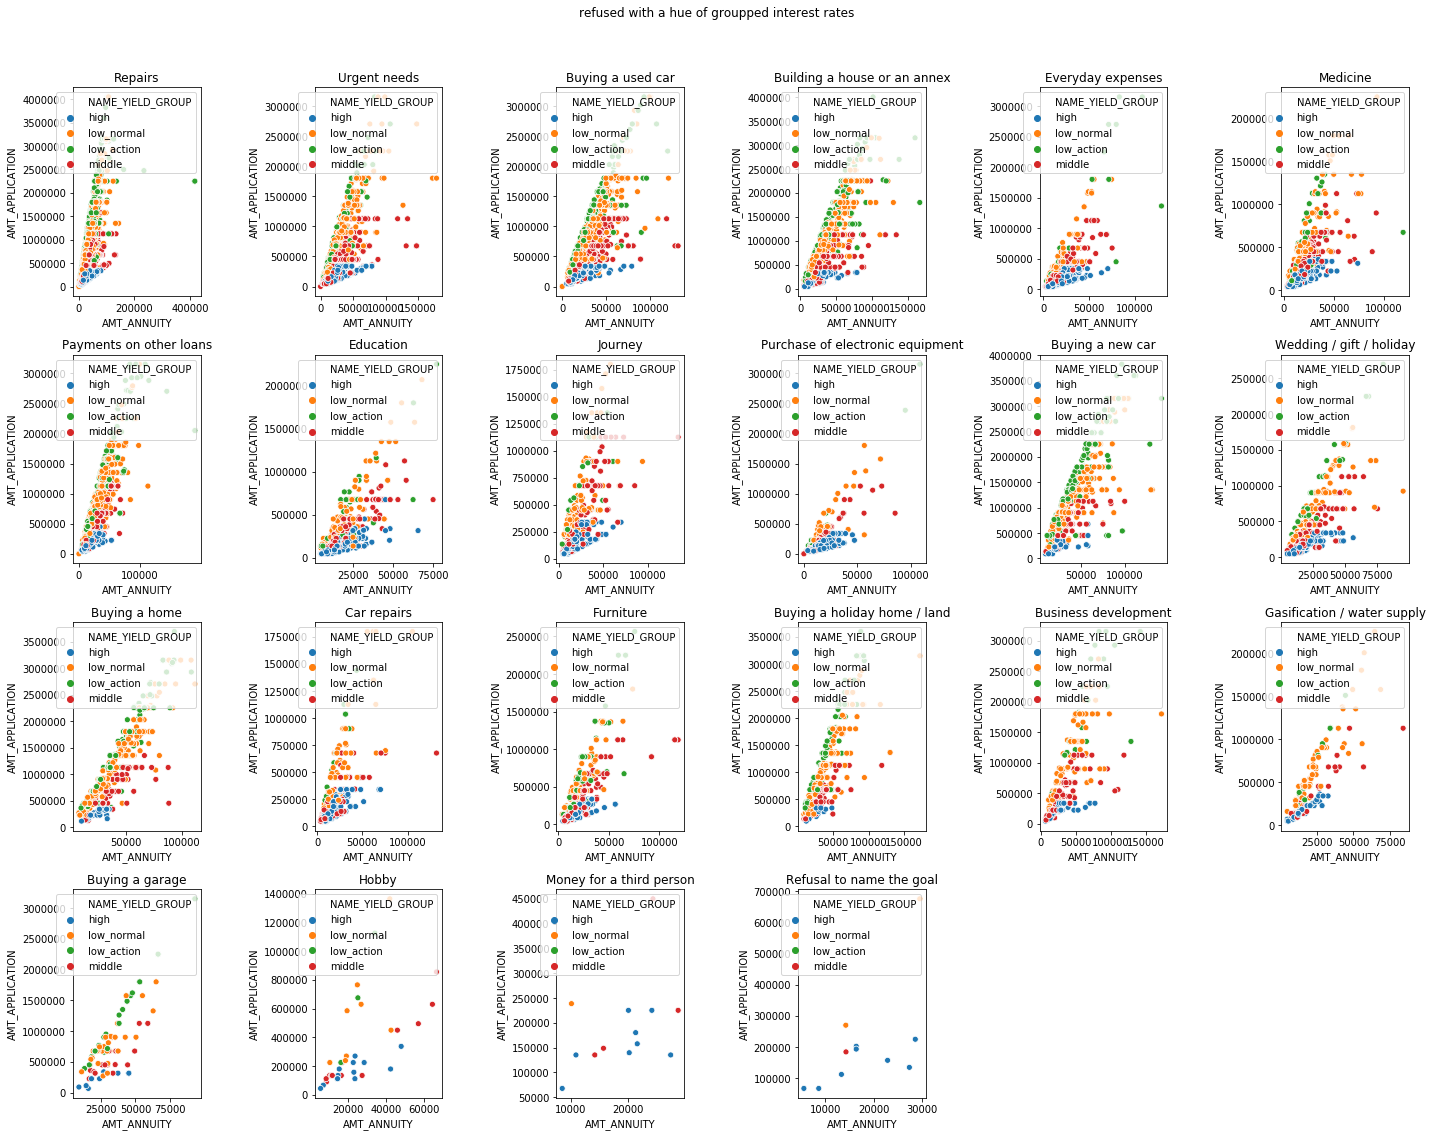

In [46]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('refused with a hue of groupped interest rates', y=1.05)
c = 1
loop_refuse = dropped_na_refused[dropped_na_refused['NAME_YIELD_GROUP'] != 'XNA']

for ii in mylist:
    loop = dropped_na_refused[dropped_na_refused['NAME_CASH_LOAN_PURPOSE'] == ii]
    plt.subplot(4, 6, c)
    plt.title('{}'.format(ii))
    plt.xlabel(ii)
    sns.scatterplot(y = loop['AMT_APPLICATION'] , x = loop['AMT_ANNUITY'], color='red',
                   hue = loop_refuse['NAME_YIELD_GROUP'])
    c = c + 1
    plt.tight_layout()
plt.show()

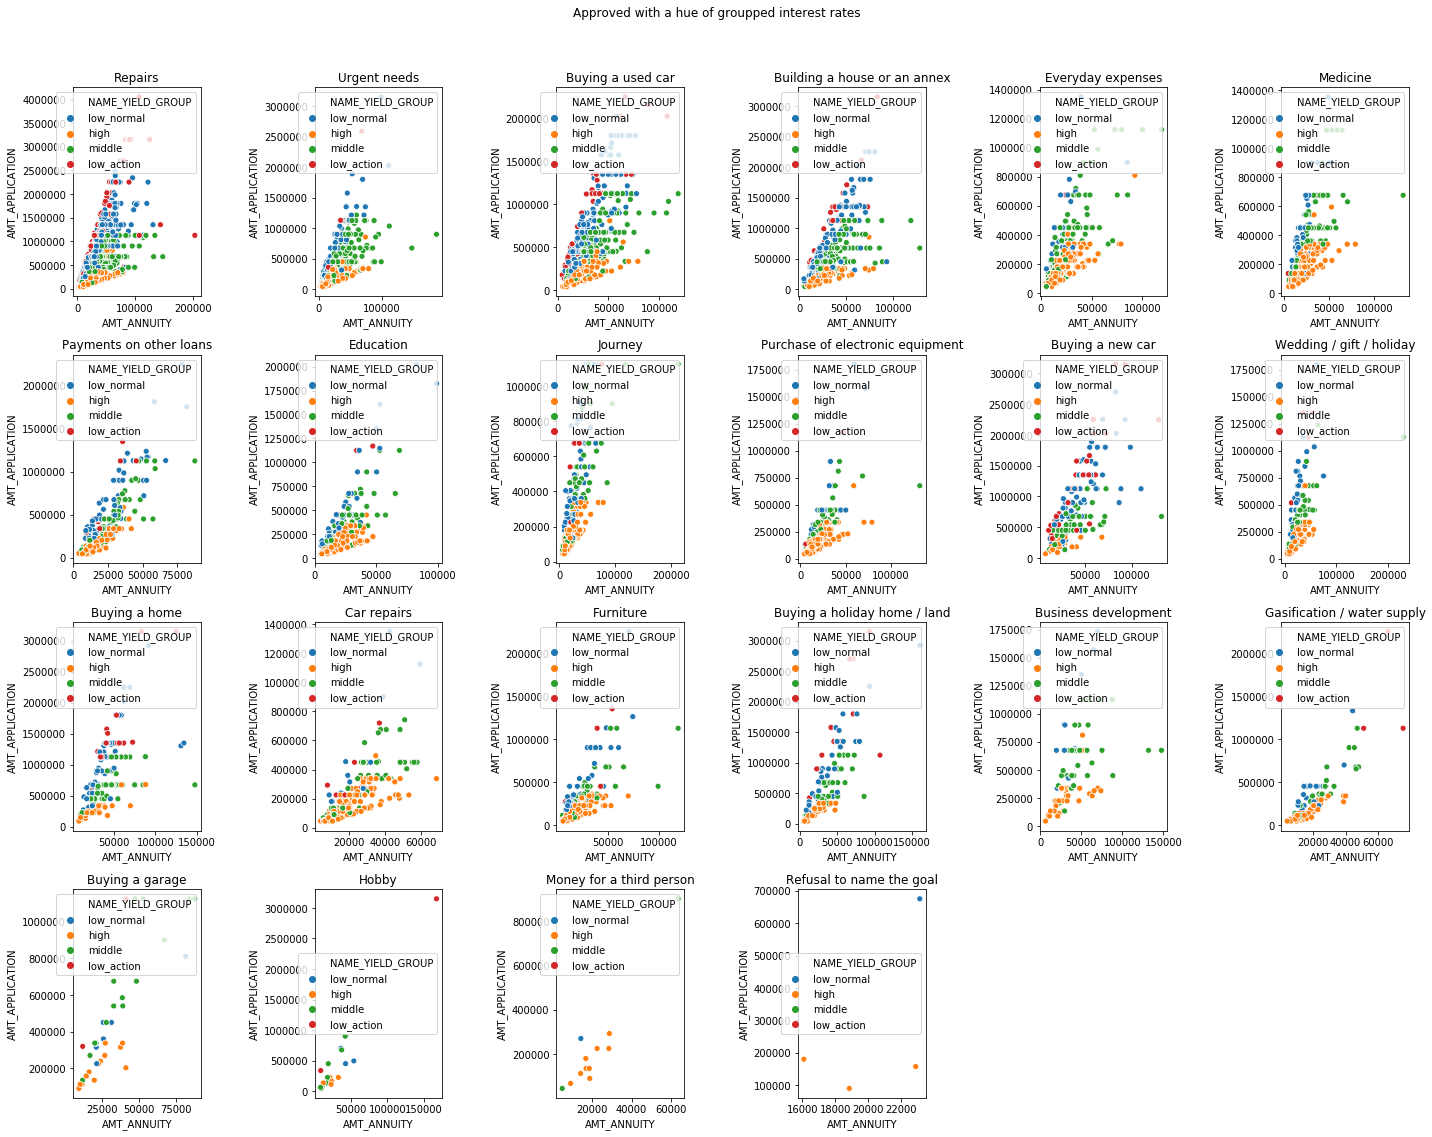

In [47]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Approved with a hue of groupped interest rates', y=1.05)
c = 1
loop_refuse = dropped_na_approved[dropped_na_approved['NAME_YIELD_GROUP'] != 'XNA']
for ii in mylist:
    loop = dropped_na_approved[dropped_na_approved['NAME_CASH_LOAN_PURPOSE'] == ii]
    plt.subplot(4, 6, c)
    plt.title('{}'.format(ii))
    plt.xlabel(ii)
    sns.scatterplot(y = loop['AMT_APPLICATION'] , x = loop['AMT_ANNUITY'], color='red',
                   hue = loop_refuse['NAME_YIELD_GROUP'])
    c = c + 1
    plt.tight_layout()
plt.show()
